In [1]:
import torch
from keras.datasets import mnist, fashion_mnist
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.
2024-06-24 16:41:19.260663: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2024-06-24 16:41:19.260834: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2024-06-24 16:41:19.260851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
# fashion_mnist , mnist
datasetname = "mnist"

if(datasetname == "mnist"):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
elif(datasetname == "fashion_mnist"):
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
image = np.transpose(np.stack([X_train[0],X_train[1],X_train[2],X_train[3]]),(1,2,0))
image.shape,image.dtype

((28, 28, 4), dtype('uint8'))

(18, 18, 4)


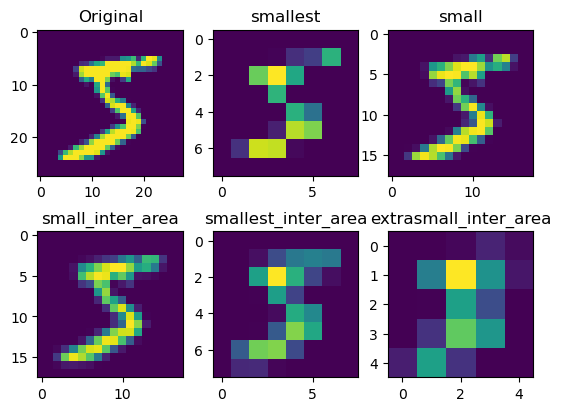

In [87]:
smallest = cv2.resize(image, (8, 8))
small = cv2.resize(image, (18, 18))
 
smallest_inter_area = cv2.resize(image, (8, 8), 
               interpolation = cv2.INTER_AREA)
small_inter_area = cv2.resize(image, (18, 18), 
               interpolation = cv2.INTER_AREA)
extrasmall_inter_area = cv2.resize(image, (5, 5), 
               interpolation = cv2.INTER_AREA)
 
print(small_inter_area.shape)
Titles =["Original", "smallest", "small", "small_inter_area","smallest_inter_area","extrasmall_inter_area"]
images =[image, smallest, small, small_inter_area,smallest_inter_area,extrasmall_inter_area]
count = 6
 
for i in range(count):
    plt.subplot(2, 3, i + 1)
    plt.title(Titles[i])
    plt.imshow(np.transpose(images[i],(2,0,1))[0])
 
plt.show()

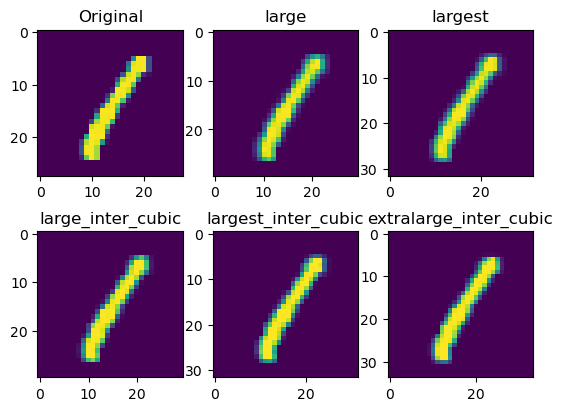

In [15]:
largest = cv2.resize(image, (32, 32))
large = cv2.resize(image, (30, 30))
 
largest_inter_cubic = cv2.resize(image, (32, 32), 
               interpolation = cv2.INTER_CUBIC )
large_inter_cubic = cv2.resize(image, (30, 30), 
               interpolation = cv2.INTER_CUBIC )
extralarge_inter_cubic = cv2.resize(image, (34, 34), 
               interpolation = cv2.INTER_CUBIC )
 
 
Titles =["Original", "large", "largest", "large_inter_cubic","largest_inter_cubic","extralarge_inter_cubic"]
images =[image, large, largest, large_inter_cubic,largest_inter_cubic,extralarge_inter_cubic]
count = 6
 
for i in range(count):
    plt.subplot(2, 3, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
 
plt.show()

In [4]:
def resize_images_of_dataloader(loader,target_size):
    mod_x = []
    ys = []
    interpolation_type=None
    for X_batch, y_batch in loader:
        X_batch = X_batch.numpy()
        y_batch = y_batch.numpy()
        if interpolation_type is None:
            img_size = X_batch.shape[-1]
            # Use different interpolation for shrinking and enlargement respectively
            if(target_size > img_size):
                interpolation_type = cv2.INTER_CUBIC
            else:
                interpolation_type = cv2.INTER_AREA
        current_batch = np.transpose(X_batch,(1,2,0))
        rz = cv2.resize(current_batch, (target_size, target_size), interpolation = interpolation_type)
        tmp = np.transpose(rz,(2,0,1))
        mod_x.extend(tmp)
        ys.extend(y_batch)
        
    return np.array(mod_x),np.array(ys)

In [15]:
target_size = 8
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=4)
(mod_X_train, mod_y_train) = resize_images_of_dataloader(loader,target_size)
loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), shuffle=False, batch_size=4)
(mod_X_test, mod_y_test) = resize_images_of_dataloader(loader,target_size)

In [16]:
mod_X_train[0].shape

(8, 8)

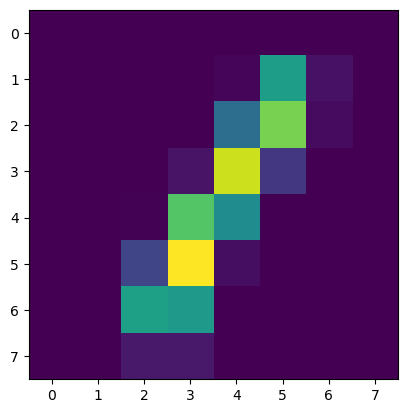

In [17]:
id = 3
plt.imshow(mod_X_train[id])

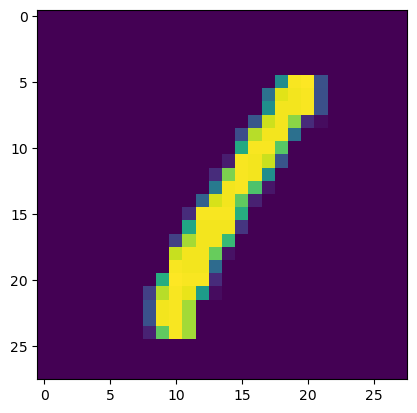

In [18]:
plt.imshow(X_train[id])

In [19]:
save_folder = "data/custom_datasets/resize_dataset/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

with open(save_folder+str(datasetname)+"_resized__"+str(target_size)+".npy", 'wb') as file:
    np.savez(file, X_train=mod_X_train,y_train=mod_y_train,X_test=mod_X_test,y_test=mod_y_test)